<a href="https://colab.research.google.com/github/akeelrashid/Hotel-Booking-Analysis/blob/main/Linear_Regression_Implementation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### <u> Objective </u>
* ### To predict the profit made by a startup on the basis of expenses incurred and the state where they operate

### <u> Tasks </u>
* ### Validate all the assumptions
* ### Compute all the regression evaluation metrics
* ### Comment on the best evaluation metrics for this problem

In [1]:
# Importing the libraries
import numpy as np
import pandas as pd
from numpy import math

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

import matplotlib.pyplot as plt

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Importing the dataset
dataset = pd.read_csv('/content/drive/MyDrive/Data Science/50_Startups.csv')

In [4]:
len(dataset)

50

In [5]:
dataset.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [6]:
dataset.shape

(50, 5)

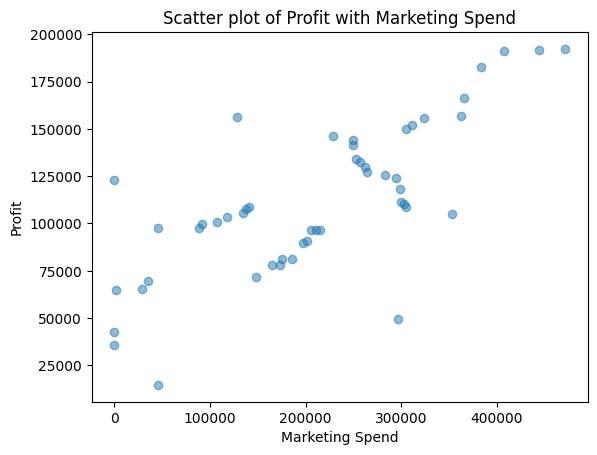

In [12]:
plt.scatter(dataset['Marketing Spend'], dataset['Profit'],alpha=0.5)
plt.title('Scatter plot of Profit with Marketing Spend')
plt.xlabel('Marketing Spend')
plt.ylabel('Profit')
plt.show()

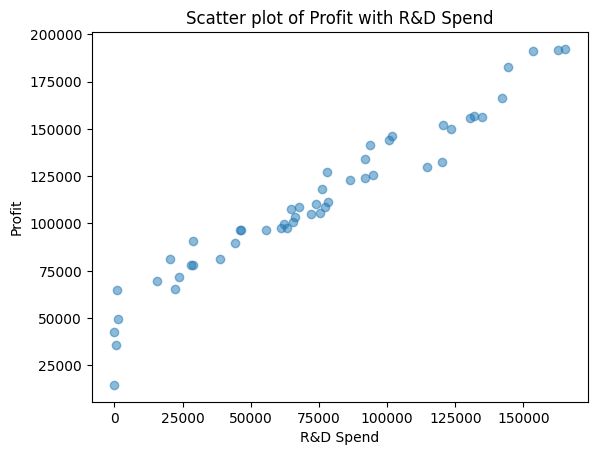

In [13]:
plt.scatter(dataset['R&D Spend'], dataset['Profit'], alpha=0.5)
plt.title('Scatter plot of Profit with R&D Spend')
plt.xlabel('R&D Spend')
plt.ylabel('Profit')
plt.show()

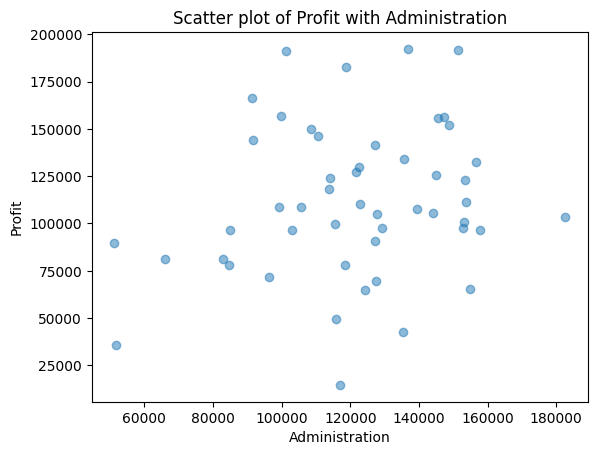

In [14]:
plt.scatter(dataset['Administration'], dataset['Profit'], alpha=0.5)
plt.title('Scatter plot of Profit with Administration')
plt.xlabel('Administration')
plt.ylabel('Profit')
plt.show()

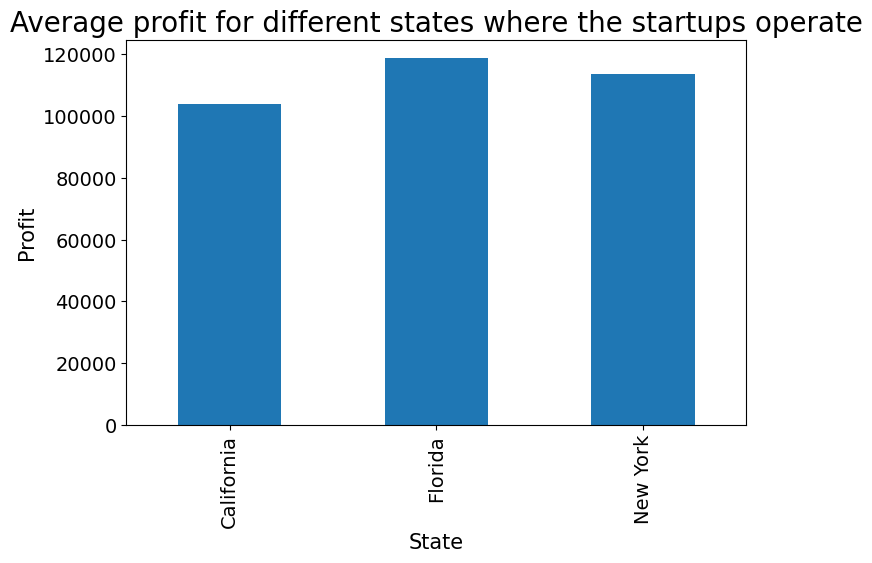

In [26]:
# Create the figure object 
ax = dataset.groupby(['State'])['Profit'].mean().plot.bar(
    figsize = (8,5),
    fontsize = 14
)

# Set the title
ax.set_title("Average profit for different states where the startups operate", fontsize = 20)

# Set x and y-labels
ax.set_xlabel("State", fontsize = 15)
ax.set_ylabel("Profit", fontsize = 15)
plt.show()

In [27]:
dataset.State.value_counts()

New York      17
California    17
Florida       16
Name: State, dtype: int64

In [28]:
# Create dummy variables for the catgeorical variable State
dataset['NewYork_State'] = np.where(dataset['State']=='New York', 1, 0)
dataset['California_State'] = np.where(dataset['State']=='California', 1, 0)
dataset['Florida_State'] = np.where(dataset['State']=='Florida', 1, 0)

# Drop the original column State from the dataframe
dataset.drop(columns=['State'],axis=1,inplace=True)

In [29]:
dataset.head()

,R&D Spend,Administration,Marketing Spend,Profit,NewYork_State,California_State,Florida_State
0,165349.20,136897.80,471784.10,192261.83,1,0,0
1,162597.70,151377.59,443898.53,191792.06,0,1,0
2,153441.51,101145.55,407934.54,191050.39,0,0,1
3,144372.41,118671.85,383199.62,182901.99,1,0,0
4,142107.34,91391.77,366168.42,166187.94,0,0,1


In [30]:
dependent_variable = 'Profit'

In [41]:
# Create a list of independent variables
independent_variables = list(set(dataset.columns.tolist()) - {dependent_variable})

In [42]:
independent_variables

['Administration',
 'NewYork_State',
 'R&D Spend',
 'Marketing Spend',
 'California_State',
 'Florida_State']

In [43]:
# Create the data of independent variables
X = dataset[independent_variables].values

# Create the dependent variable data
y = dataset[dependent_variable].values

In [46]:
# Splitting the dataset into the Training set and Test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [52]:
# Transforming data
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [53]:
X_train[0:10]

array([[0.48655174, 0.        , 0.33561668, 0.45494286, 0.        ,
        1.        ],
       [0.3173015 , 1.        , 0.2782839 , 0.43561799, 0.        ,
        0.        ],
       [0.87258866, 0.        , 0.45557444, 0.28413435, 0.        ,
        1.        ],
       [1.        , 0.        , 0.2807759 , 0.44680961, 1.        ,
        0.        ],
       [0.59103645, 0.        , 0.55488118, 0.62511553, 0.        ,
        1.        ],
       [0.88568959, 0.        , 0.7880179 , 0.68649342, 0.        ,
        1.        ],
       [0.98922572, 0.        , 0.72539353, 0.54370828, 0.        ,
        1.        ],
       [0.6847981 , 1.        , 0.0060492 , 0.0040356 , 0.        ,
        0.        ],
       [0.00432296, 1.        , 0.00327821, 0.        , 0.        ,
        0.        ],
       [0.95618996, 1.        , 0.39676926, 0.22709197, 0.        ,
        0.        ]])

In [56]:
# Fitting Multiple Linear Regression to the Training set
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [57]:
# Predicting the Test set results
y_pred = regressor.predict(X_test)

In [58]:
math.sqrt(mean_squared_error(y_test, y_pred))

15023.010725678303

In [59]:
r2_score(y_test, y_pred)

0.8235262062096442